Importing Libraries

In [3]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

The dataset contains 9 columns, all are of numeric types except the column 'Sex' which is of categorical type. Out of 9 features, 8 are independent (predictor) variables and remaining one is dependent (response) variable.

The dataset contains 4177 rows and 9 columns including target variable



# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Here we can observe that there are seven float type, one integer type and one object type columns are present in the given dataset. Since there is an object datatype we will convert it into numeric by using encoding method later.

In [6]:
#Checking the null values

df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

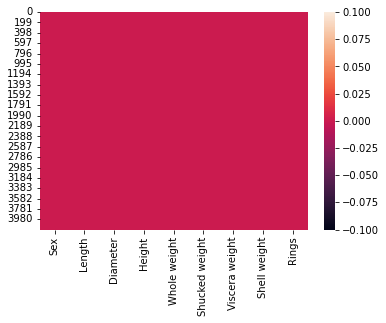

In [7]:
#Checking the null values through heatmap
sns.heatmap(df.isnull())

From above, we can see there is no null values present in our dataset.

# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Sex'] = lbl.fit_transform(df['Sex'])

In [8]:
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [9]:
df["Sex"].unique()

array([2, 0, 1])

After encoding, now Male=2, Female=0, Infants=1.

# Data Visualisation

# Univariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

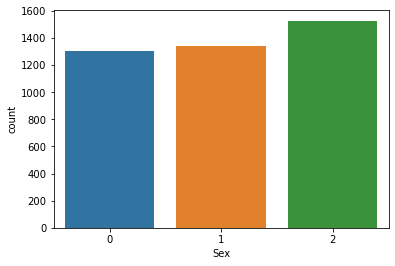

In [10]:
sns.countplot(df["Sex"])

Above plot is for count of column Sex.We have already converted the catagorical column as Male=2, Female=0, Infants=1. We can see that data is almost balanced between Female and Infants but Male class is little bit higher than other two. Since we are treating this dataset as a regression type problem, not balancing the data.

In [11]:
df.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

# Bivariate Analysis

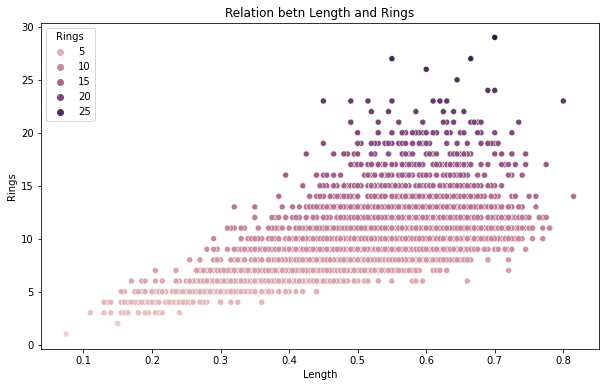

In [13]:
# Checking the relation using scatter plot
plt.figure(figsize=[10,6])
plt.title('Relation betn Length and Rings')
sns.scatterplot(df['Length'],df['Rings'],hue=df["Rings"]);

From above, we can see that as the length increases, no of rings is also increases.

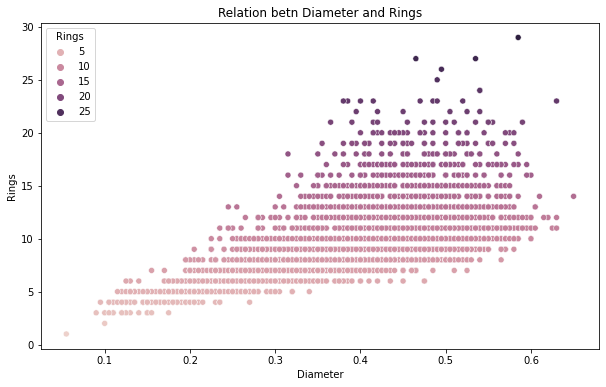

In [15]:
plt.figure(figsize=[10,6])
plt.title('Relation betn Diameter and Rings')
sns.scatterplot(df['Diameter'],df['Rings'],hue=df["Rings"]);

In [ ]:
Increase in diameter, Ring count also increases.

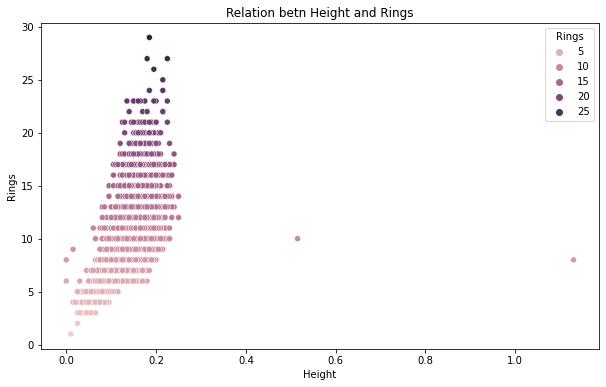

In [14]:
plt.figure(figsize=[10,6])
plt.title('Relation betn Height and Rings')
sns.scatterplot(df['Height'],df['Rings'],hue=df["Rings"]);

Here we can see at the minimum height only the ablone has accured the maxmium Rings value

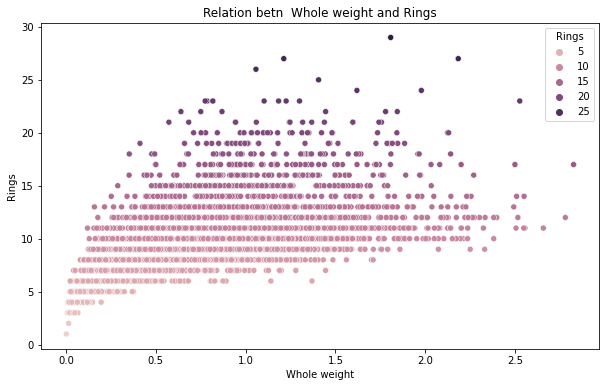

In [17]:
plt.figure(figsize=[10,6])
plt.title('Relation betn  Whole weight and Rings')
sns.scatterplot(df['Whole weight'],df['Rings'],hue=df["Rings"]);

 As whole weight is increased there is hight possiblity of getting higher ring value.

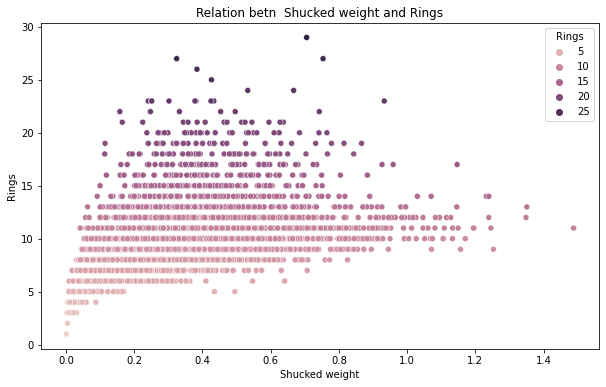

In [18]:
plt.figure(figsize=[10,6])
plt.title('Relation betn  Shucked weight and Rings')
sns.scatterplot(df['Shucked weight'],df['Rings'],hue=df["Rings"]);

Similar to whole weight, as shucked weight is increased there is hight possiblity of getting higher ring value.

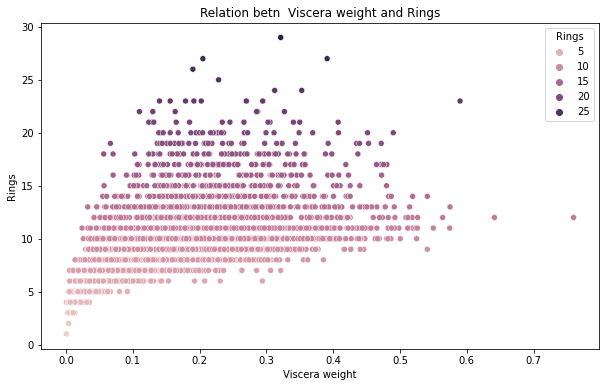

In [19]:
plt.figure(figsize=[10,6])
plt.title('Relation betn  Viscera weight and Rings')
sns.scatterplot(df['Viscera weight'],df['Rings'],hue=df["Rings"]);

Similar to whole weight, as Viscera weight is increased there is hight possiblity of getting higher ring value.

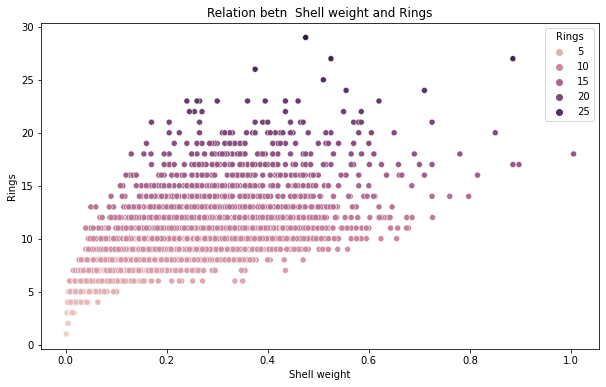

In [20]:
plt.figure(figsize=[10,6])
plt.title('Relation betn  Shell weight and Rings')
sns.scatterplot(df['Shell weight'],df['Rings'],hue=df["Rings"]);

Similar to whole weight, as Shell weight is increased there is hight possiblity of getting higher ring value.

# Multivariate Analysis

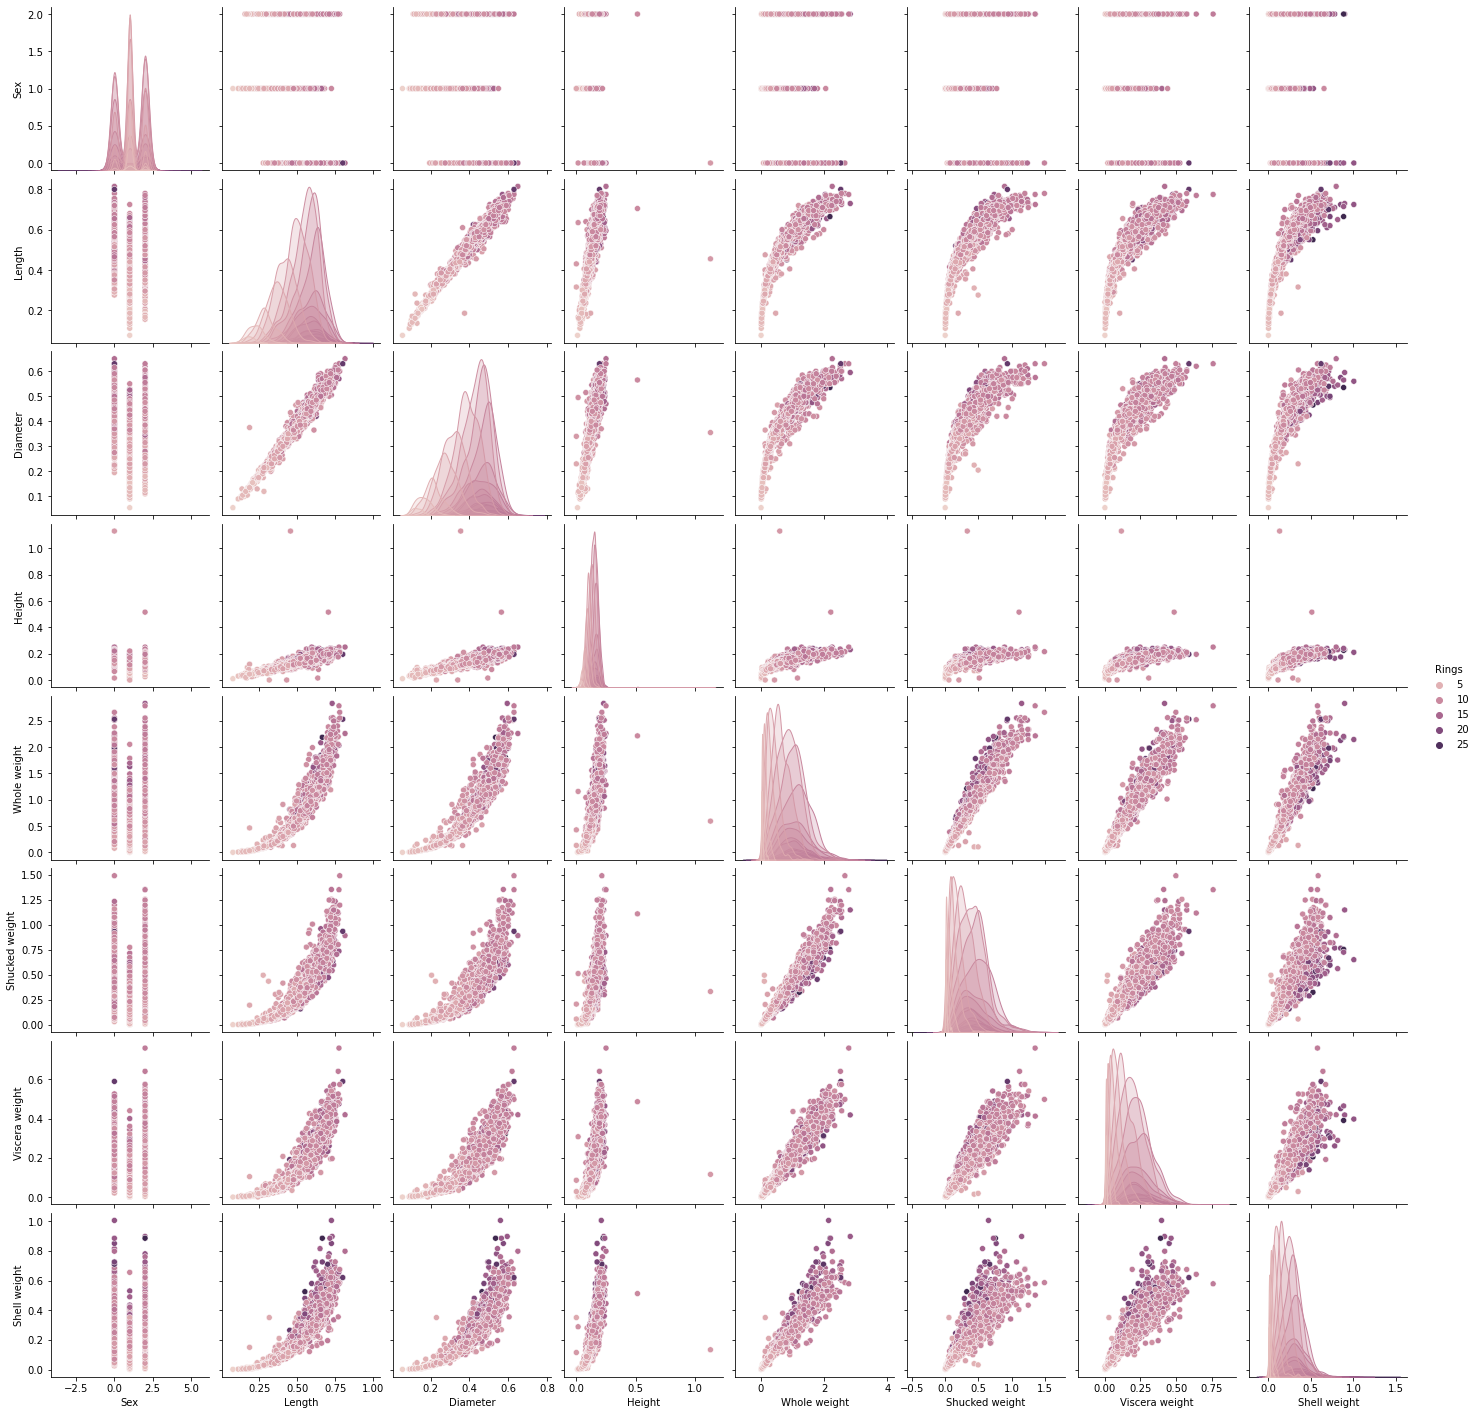

In [21]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Rings")

From above, it is pairwise relation between the columns on the basis of target variable 'Rings'. We need to check in details if there is any multicolinearity

# Checking the Corelation

In [23]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


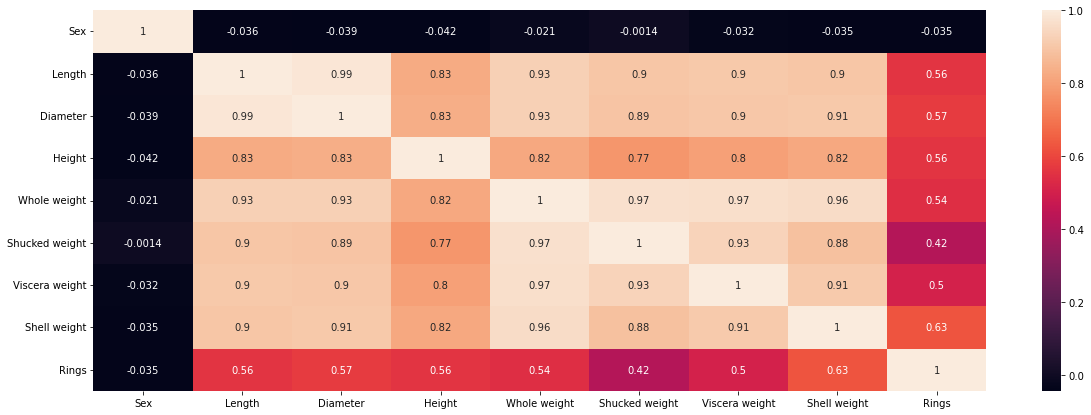

In [24]:
# Plotting the heatmap to visualise and find the coefficient of multicollinearity
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see all the variables are highly correlated with each other. All the independent features shows the multicollinearity toward each other but this is because all these variables are well related to the target variable to predict the age of the abalone.

# Outliers

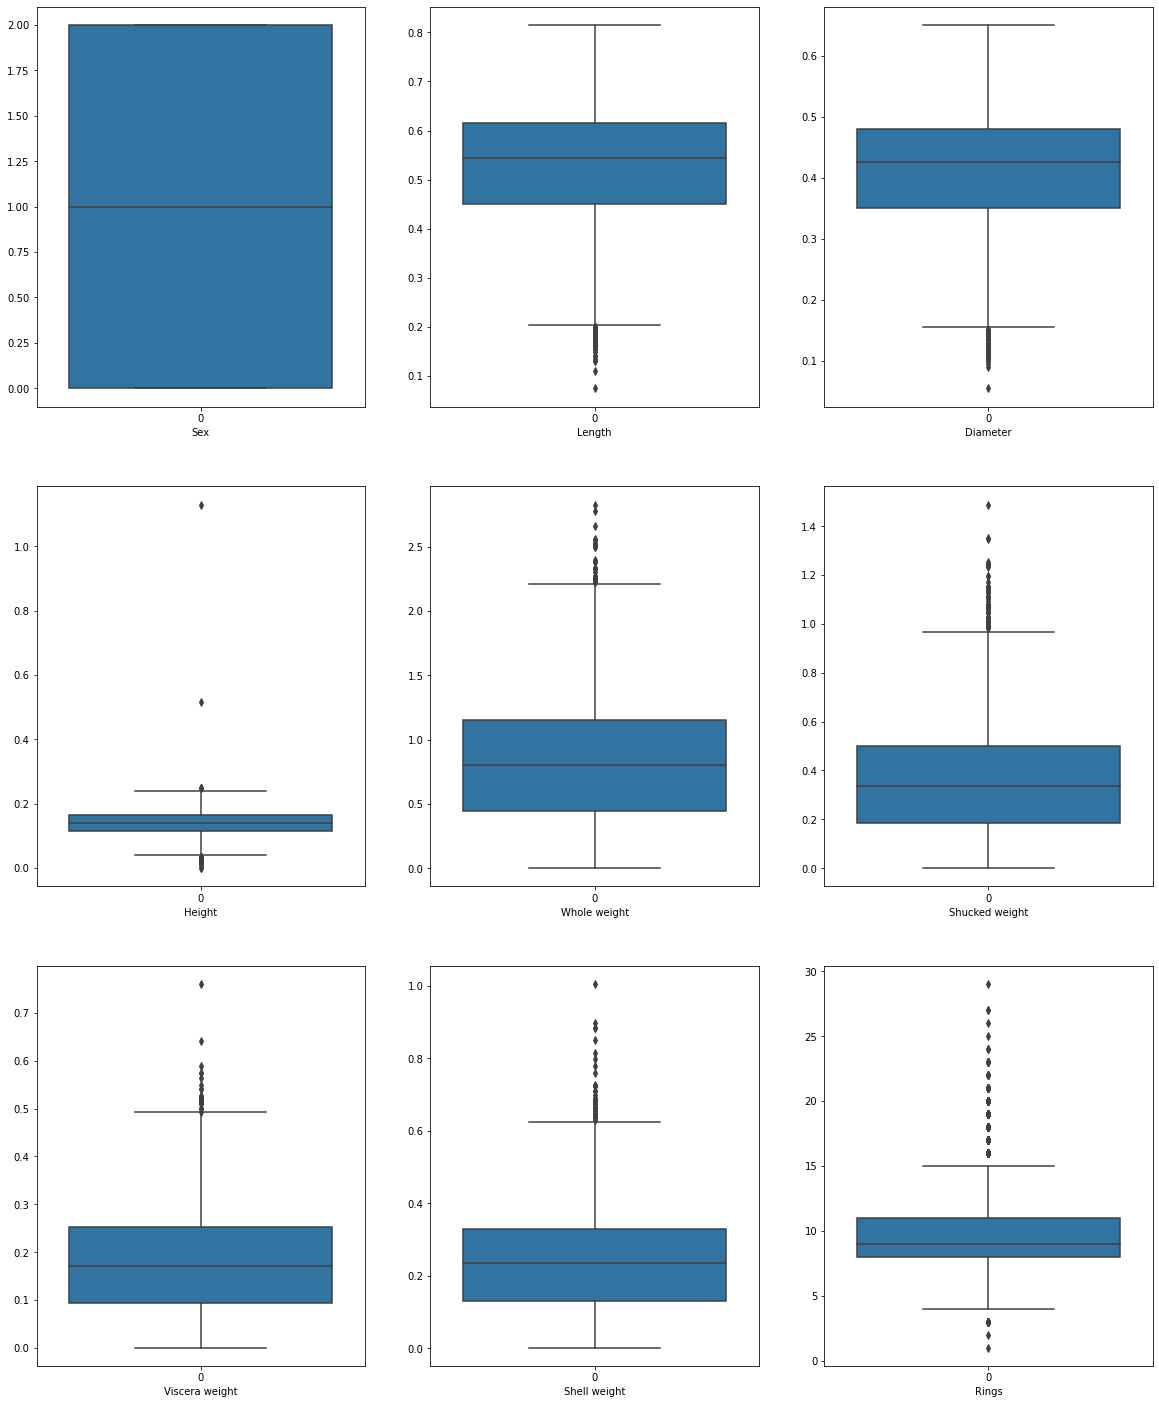

In [25]:
# now check the outliers present in our data using box plot
plt.figure(figsize=(20,25))
graph=1
for c in df:
    if graph<=9:
        plt.subplot(3,3,graph)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
    graph+=1    
plt.show()

From above imgae, we can see outliers present on all features except Sex.
We will remove Outliers throiugh zscore

In [26]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [27]:
Data=df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]

In [28]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(Data))

z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [29]:
z.shape

(4177, 7)

In [30]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4084, 9)


In [31]:
Loss_percentage=(4177-4084)/4177*100
print(Loss_percentage)

2.2264783337323437


# Skewness

In [32]:
df_new.skew()

Sex              -0.092911
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

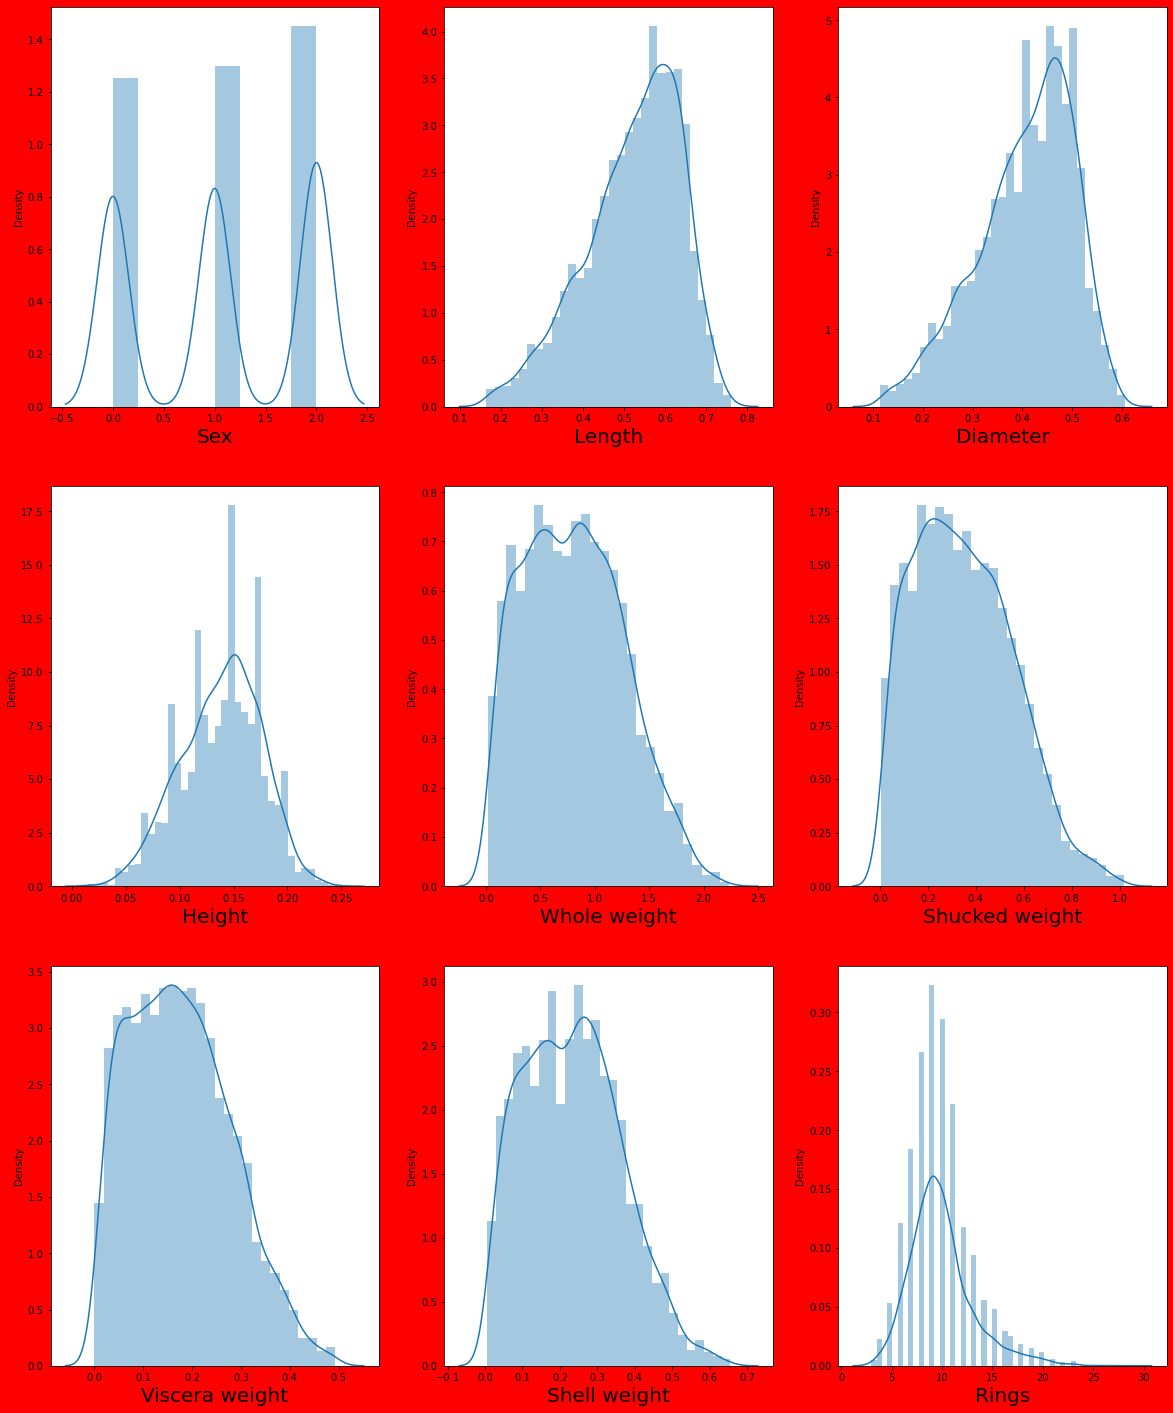

In [33]:
# now we will check skewness present in our data or not
plt.figure(figsize=(20,25),facecolor='r')
plno=1
for i in df_new:
    if plno<=9:
        ax=plt.subplot(3,3,plno)
        sns.distplot(df_new[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

Here we can observe that some columns Length, Diameter and Age are highly skewed. So we need to remove it. We can ignore Rings since it is our target variable.



In [34]:
#Separating feature and label
x=df_new.drop(['Rings'],axis=1)
y = df_new.iloc[:,-1]

Removing skewness through power transform

In [35]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='yeo-johnson')
x_new=pw.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Sex              -0.174014
Length           -0.084034
Diameter         -0.080768
Height           -0.016167
Whole weight     -0.018290
Shucked weight    0.020227
Viscera weight    0.034242
Shell weight      0.017040
dtype: float64

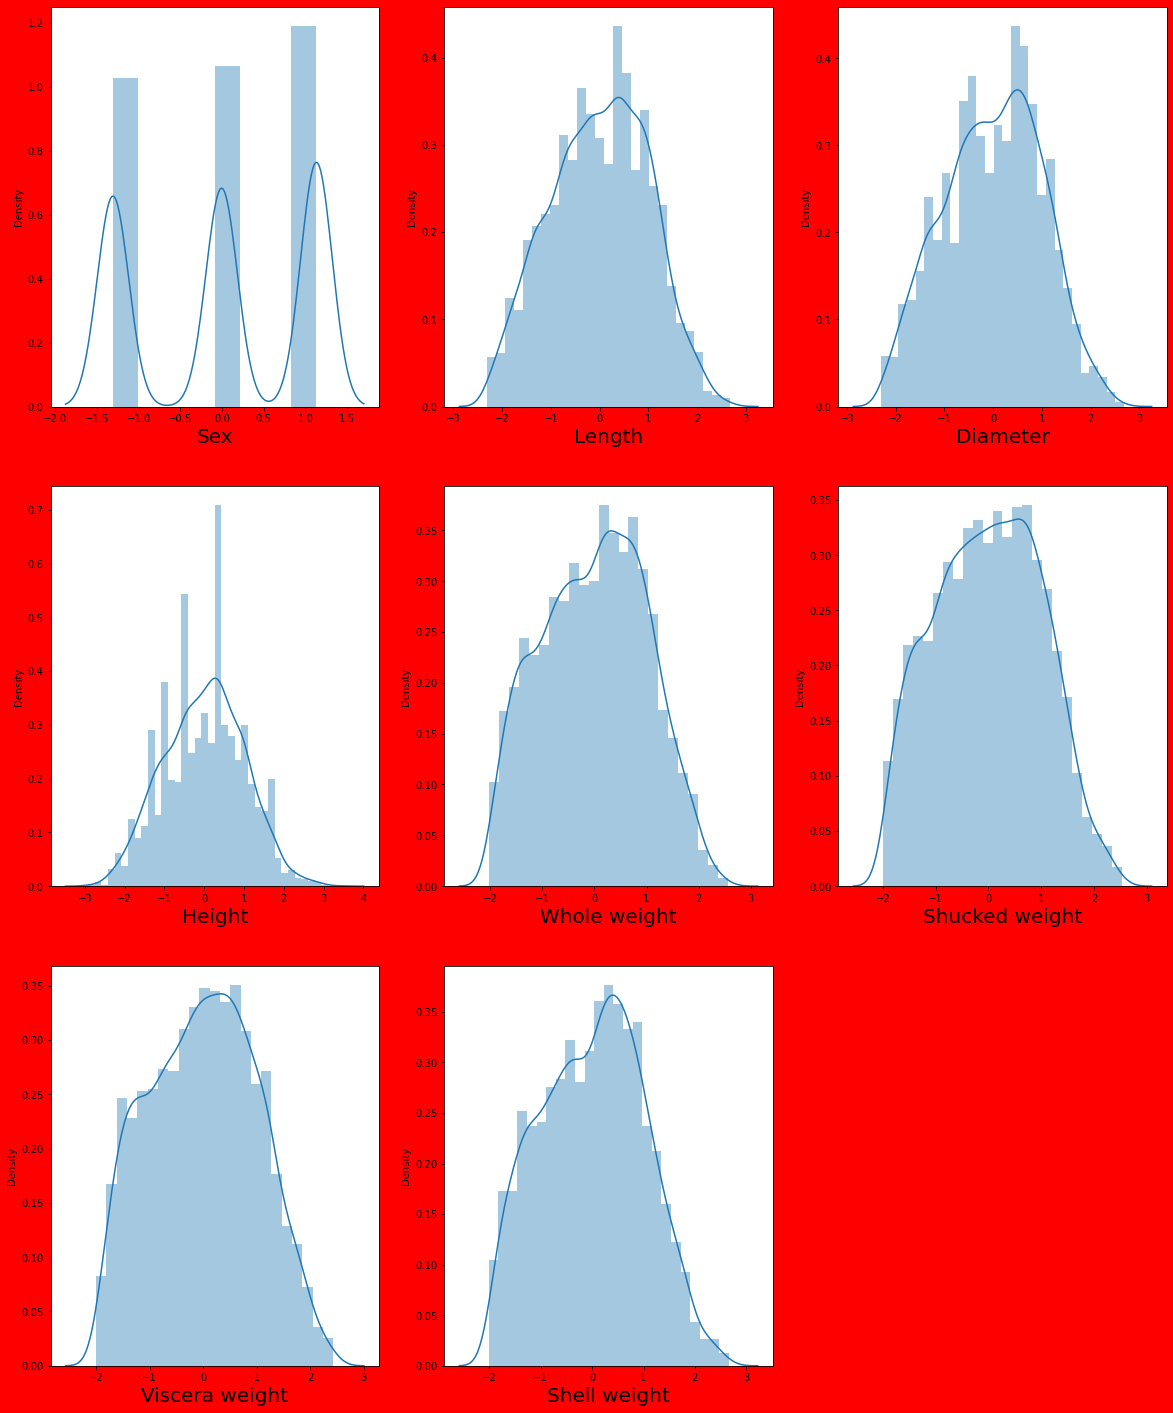

In [36]:
# Plotting normal distribution curve after removing skewness
plt.figure(figsize=(20,25),facecolor='r')
plno=1
for i in x_new:
    if plno<=11:
        ax=plt.subplot(3,3,plno)
        sns.distplot(x_new[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

From above, we can see skewness is removed

# Standardization

In [39]:
#Now we will satndardize our data using standardscalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x_new),columns=x_new.columns)
x_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.131818,-0.696161,-0.554594,-1.168296,-0.588451,-0.550030,-0.698406,-0.598766
1,1.131818,-1.420433,-1.409424,-1.289091,-1.362331,-1.319429,-1.341090,-1.340159
2,-1.308220,-0.058200,0.025024,-0.142854,-0.199039,-0.371744,-0.251272,-0.096466
3,1.131818,-0.811094,-0.554594,-0.409259,-0.583488,-0.601436,-0.550573,-0.555262
4,-0.005100,-1.538442,-1.482282,-1.525912,-1.422319,-1.386634,-1.459221,-1.489465
...,...,...,...,...,...,...,...,...
4079,-1.308220,0.278101,0.378060,0.698142,0.262973,0.209484,0.681527,0.208481
4080,1.131818,0.534430,0.257350,-0.142854,0.426834,0.528748,0.464194,0.295413
4081,1.131818,0.640858,0.693557,1.921334,0.839694,0.898004,1.082325,0.641018
4082,-1.308220,0.916960,0.825397,0.269701,0.683156,0.920420,0.867974,0.555688


# Modelling

In [91]:
# importing different  models.We will use  Regressor technique as  the label has  continous or numerical values 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [46]:
#Finding the best random state

lr= LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"Best training accuracy is :{r2_score(y_train,pred_train)}, at random state : {i}")
print(f"Best test accuracy is :{r2_score(y_test,pred_test)}, at random state : {i}")

Best training accuracy is :0.5255110081382487, at random state : 99
Best test accuracy is :0.525660104172941, at random state : 99


From above, we can see best accuracy is 92.71% for random state 70

Splitting the data using this best random state and find the best model

In [47]:
#Creating train test split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=99)

# Linear Regression

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression : ",r2_score(y_test,pred_test))

Accuracy score of Linear Regression :  0.525660104172941


Linear Regression model gives best accuracy score as 52.56%

# Cross Validation on Linear Regression

In [51]:
Train_accuracy= r2_score(y_train, pred_train)
Test_accuracy= r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x_new,y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for testting {Test_accuracy}")

At cross fold 2 the cv score is 0.5203203896875899 and accuracy score for testting 0.525660104172941
At cross fold 3 the cv score is 0.49731495629032957 and accuracy score for testting 0.525660104172941
At cross fold 4 the cv score is 0.4163796377873297 and accuracy score for testting 0.525660104172941
At cross fold 5 the cv score is 0.40197170763292417 and accuracy score for testting 0.525660104172941
At cross fold 6 the cv score is 0.4124696721364122 and accuracy score for testting 0.525660104172941
At cross fold 7 the cv score is 0.43519936725743535 and accuracy score for testting 0.525660104172941
At cross fold 8 the cv score is 0.37124529569475245 and accuracy score for testting 0.525660104172941
At cross fold 9 the cv score is 0.4092084494942795 and accuracy score for testting 0.525660104172941


In [103]:
CV_selected=cross_val_score(lr,x_scaled,y,cv=2).mean()
print("The cv score is: ", CV_selected,"\nThe accuracy score is: ", Test_accuracy)

The cv score is:  0.5203203896875899 
The accuracy score is:  0.525660104172941


Here at cv= 2 , cv score is almost equal to Accuracy score

# Decision Tree

In [102]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print('R2_Score:',r2_score(y_test,preddt))

dtcvscore=cross_val_score(dt,x_scaled,y,cv=2)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv)

R2_Score: 0.06480850904548374
Cross Val Score: 0.08430140990791868


Decision Tree is not performing well. We will check for other model

# Random Forest


In [97]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print('R2_Score:', r2_score(y_test, predrf))
rfcv=cross_val_score(rf,x_scaled,y, cv=2)
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore )


R2_Score: 0.5132095155238625
Cross val Score : 0.5219650494165894


In [71]:
print('Error:')

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predrf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predrf))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predrf)))

Error:
Mean Absolute Error: 1.5216965742251223
Mean Squared Error: 4.58046101141925
Root Mean Square Error: 2.1402011614376932


# KNN 

In [96]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print('R2_Score:', r2_score(y_test, predknn))
knncv=cross_val_score(knn,x_scaled,y, cv=2)
knncvscore=knncv.mean()
print('Cross val Score :',knncvscore )

R2_Score: 0.4273679435337444
Cross val Score : 0.4482594695892903


In [93]:
print('Error:')

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predknn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predknn))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predknn)))

Error:
Mean Absolute Error: 1.6208809135399673
Mean Squared Error: 5.455399673735726
Root Mean Square Error: 2.3356797027280356


# Gradient Boosting 

In [104]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)

print('R2_Score:', r2_score(y_test, predgb))
gbcv=cross_val_score(rf,x_scaled,y, cv=2)
gbcvscore=rfcv.mean()
print('Cross val Score :',gbcvscore )

R2_Score: 0.5444682181916157
Cross val Score : 0.5219650494165894


In [105]:
print('Error:')

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predgb))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predgb)))

Error:
Mean Absolute Error: 1.4886720393022654
Mean Squared Error: 4.339798839047631
Root Mean Square Error: 2.0832183848669423


From above, we can select Gradient Boosting as the best model and we will use this model for further processing.

# Hyper parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [109]:
 parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [113]:
grid_gb = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_gb.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [114]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gb.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gb.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.5282946889056275

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}


Accuracy score is now marginally increased. So we can find tha Gradient Boosting is the best model.

# Saving the model

In [115]:
import pickle
filename='Abalone_Case_Study.pkl'
pickle.dump(gb,open(filename,'wb'))

# Conclusion and the prediction by the model

In [116]:
a = np.array(y_test)
predicted = np.array(gb.predict(x_test))
df_ablone = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_ablone

,orginal,predicted
0,9,9.430032
1,10,9.579324
2,14,8.885180
3,12,12.408109
4,6,5.676389
...,...,...
1221,9,10.216995
1222,8,8.741949
1223,11,11.274063
1224,15,13.180692
